In [32]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data_clean.csv')

In [11]:
correlations = data.corr()
correlations

,distance,consume,temp_inside,temp_outside,AC,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hour,avg_speed
distance,1.000000,-0.128967,0.054897,0.062349,-0.018200,-0.013994,0.057360,-0.056889,0.991920,0.991414,0.397605,0.757346
consume,-0.128967,1.000000,-0.109568,-0.226847,0.068300,0.175446,-0.120680,0.220403,-0.052178,-0.052069,-0.161126,-0.152185
temp_inside,0.054897,-0.109568,1.000000,0.357431,0.300407,-0.035199,0.241530,-0.224108,0.046208,0.046043,0.060039,0.019542
temp_outside,0.062349,-0.226847,0.357431,1.000000,0.167562,-0.186315,0.346903,-0.990287,0.026778,0.028671,0.015411,0.060505
AC,-0.018200,0.068300,0.300407,0.167562,1.000000,0.242915,0.088598,-0.130129,-0.013221,-0.011976,-0.035408,0.025340
rain,-0.013994,0.175446,-0.035199,-0.186315,0.242915,1.000000,-0.112650,0.189179,0.006451,0.007693,0.009489,0.006685
sun,0.057360,-0.120680,0.241530,0.346903,0.088598,-0.112650,1.000000,-0.326036,0.045421,0.046071,0.081618,0.013730
temp_diff,-0.056889,0.220403,-0.224108,-0.990287,-0.130129,0.189179,-0.326036,1.000000,-0.021064,-0.023063,-0.007143,-0.060227
fuel_used,0.991920,-0.052178,0.046208,0.026778,-0.013221,0.006451,0.045421,-0.021064,1.000000,0.999822,0.390143,0.746150
cost_of_trip,0.991414,-0.052069,0.046043,0.028671,-0.011976,0.007693,0.046071,-0.023063,0.999822,1.000000,0.387713,0.746029


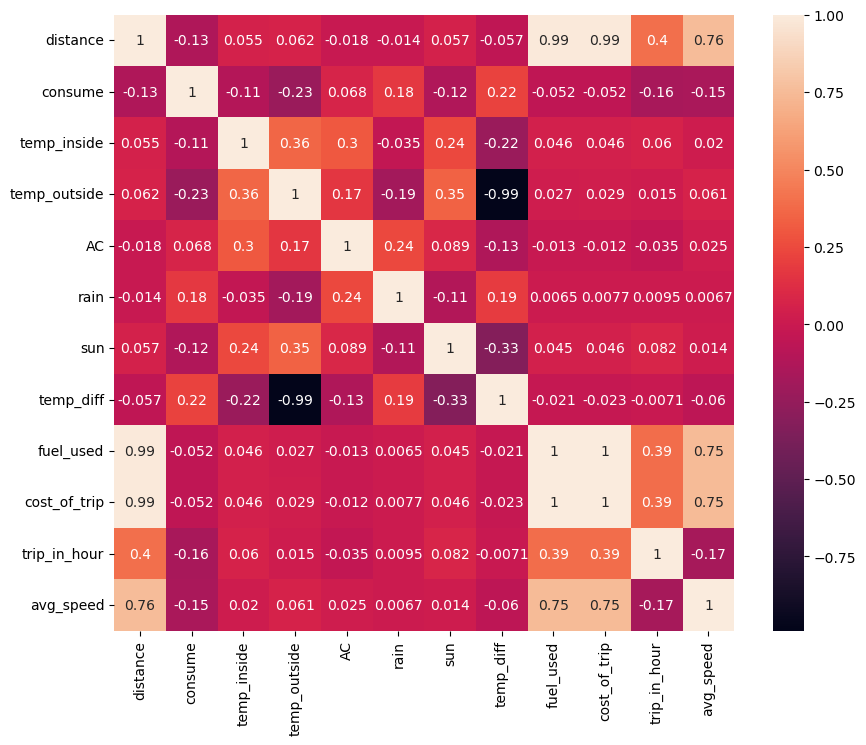

In [13]:
fig, ax=plt.subplots(figsize =(10,8))
ax = sns.heatmap(correlations, annot = True)
plt.show()

**There is Multi_colinearity, i will drop the columns whcih were created the earlier**

In [14]:
cols_to_drop = ['temp_diff', 'cost_of_trip', 'fuel_used', 'avg_speed']

data = data.drop(cols_to_drop, axis = 1)

In [15]:
data

,distance,consume,temp_inside,temp_outside,gas_type,AC,rain,sun,trip_in_hour
0,28.000000,5.000000,21.5,12,E10,0,0,0,0.433333
1,12.000000,4.200000,21.5,13,E10,0,0,0,0.500000
2,11.200000,5.500000,21.5,15,E10,0,0,0,0.633333
3,12.900000,3.900000,21.5,14,E10,0,0,0,0.600000
4,18.500000,4.500000,21.5,15,E10,0,0,0,0.766667
...,...,...,...,...,...,...,...,...,...
771,19.652835,4.912371,24.5,18,SP98,0,0,0,0.650000
772,19.652835,4.912371,25.0,31,SP98,1,0,0,0.633333
773,19.652835,4.912371,25.0,19,SP98,0,0,0,0.750000
774,19.652835,4.912371,25.0,31,SP98,1,0,0,0.700000


**Splitting into X_features and y_target. we are trying to predict the amount of fuel consumed.**

In [17]:
X = data.drop('consume', axis =1)
y = data['consume']
X

,distance,temp_inside,temp_outside,gas_type,AC,rain,sun,trip_in_hour
0,28.000000,21.5,12,E10,0,0,0,0.433333
1,12.000000,21.5,13,E10,0,0,0,0.500000
2,11.200000,21.5,15,E10,0,0,0,0.633333
3,12.900000,21.5,14,E10,0,0,0,0.600000
4,18.500000,21.5,15,E10,0,0,0,0.766667
...,...,...,...,...,...,...,...,...
771,19.652835,24.5,18,SP98,0,0,0,0.650000
772,19.652835,25.0,31,SP98,1,0,0,0.633333
773,19.652835,25.0,19,SP98,0,0,0,0.750000
774,19.652835,25.0,31,SP98,1,0,0,0.700000


**Splitting into Training and Testing Data**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [24]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

**Transform and scale our numerical data**

In [27]:
transformer = MinMaxScaler().fit(X_train_num)
#only transforming on the Train data

X_train_norm = transformer.transform(X_train_num)
print(X_train_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns = X_train_num.columns)
X_train_num_scale.head()

(620, 7)


,distance,temp_inside,temp_outside,AC,rain,sun,trip_in_hour
222,0.052456,0.538462,0.416667,0.0,0.0,0.0,0.539474
97,0.068670,0.384615,0.388889,0.0,0.0,0.0,0.250000
275,0.070100,0.461538,0.416667,0.0,0.0,0.0,0.342105
111,0.069623,0.307692,0.333333,0.0,0.0,0.0,0.144737
371,0.093467,0.461538,0.722222,0.0,0.0,0.0,0.250000


**Encode the single categorical column**

In [28]:
X_train_cat['gas_type']= np.where(X_train_cat['gas_type'] == 'E10', 1,0)
X_train_cat['gas_type']

222    0
97     0
275    0
111    0
371    0
      ..
742    0
528    1
74     0
176    1
338    1
Name: gas_type, Length: 620, dtype: int32

In [29]:
X_test_cat['gas_type']= np.where(X_test_cat['gas_type'] == 'E10', 1,0)
X_test_cat['gas_type']

724    1
4      1
65     0
595    0
231    0
      ..
289    0
609    0
580    0
530    1
3      1
Name: gas_type, Length: 156, dtype: int32

**Merge the numerical and categorical**

In [30]:
X_train = pd.concat([X_train_num, X_train_cat], axis = 1)
X_train
X_test = pd.concat([X_test_num, X_test_cat], axis = 1)
X_test

,distance,temp_inside,temp_outside,AC,rain,sun,trip_in_hour,gas_type
724,19.652835,21.5,21,0,0,0,0.833333,1
4,18.500000,21.5,15,0,0,0,0.766667,1
65,12.400000,21.5,8,0,0,0,0.950000,0
595,19.652835,20.0,10,0,0,0,0.433333,0
231,11.800000,22.5,1,0,0,0,0.716667,0
...,...,...,...,...,...,...,...,...
289,7.400000,22.0,18,0,0,1,0.416667,0
609,19.652835,22.5,9,0,0,0,0.533333,0
580,19.652835,22.0,4,0,0,0,0.716667,0
530,19.652835,21.5,17,0,0,0,0.816667,1


**First try at Linear Regression**

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_test)

In [35]:
print('The R2 score is:', lm.score(X_test,y_test))

The R2 score is: -0.06690090225940581


**Looking at the Regressor Models**

In [37]:
def models_automation(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f'{model.__class__.__name__}: Train-> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}')

In [40]:
model_list = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor()]
models_automation(model_list, X_train, y_train, X_test, y_test)

LinearRegression: Train-> 0.12040109230856821, Test -> -0.06690090225940581
KNeighborsRegressor: Train-> 0.6723783672697969, Test -> 0.3840047161470683
DecisionTreeRegressor: Train-> 0.9983081600526896, Test -> 0.35649313139283834


In [ ]:
*KNeihgborRegressor give the best Score